## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps with a specific domain.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py -u <user_name> -p <password>

This will generate a token that can then be used by earthkit and polytope.

You can also run the script without arguments to enter your username and password.

In [ ]:
!python3 ~/polytope-examples/desp-authentication.py

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-maps
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

In [1]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "rd",
        "expver": "i7yv",
        "stream": "oper",
        "date": "20231211",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)


2024-05-14 15:22:20 - INFO - Key read from /Users/maaw/.polytopeapirc
2024-05-14 15:22:20 - INFO - Sending request...
{'request': 'class: rd\n'
            "date: '20231211'\n"
            'expver: i7yv\n'
            'levtype: sfc\n'
            "param: '167'\n"
            "step: '0'\n"
            'stream: oper\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-05-14 15:22:20 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:22:21 - INFO - Request accepted. Please poll http://polytope.lumi.apps.dte.destination-earth.eu/api/v1/requests/f69648c1-14e6-4cbd-bcbe-45bb0a9c0eab for status
2024-05-14 15:22:21 - INFO - Polytope user key found in session cache for user maaw
2024-05-14 15:22:21 - INFO - Checking request status (f69648c1-14e6-4cbd-bcbe-45bb0a9c0eab)...
2024-05-14 15:22:22 - INFO - The current status of the request is 'queued'
2024-05-14 15:22:23 - INFO - The current status of the request is 'processing'
2024-05-14 15:

f69648c1-14e6-4cbd-bcbe-45bb0a9c0eab:   0%|          | 0.00/75.3M [00:00<?, ?B/s]

In [2]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units='celsius',
    extend='both',
)

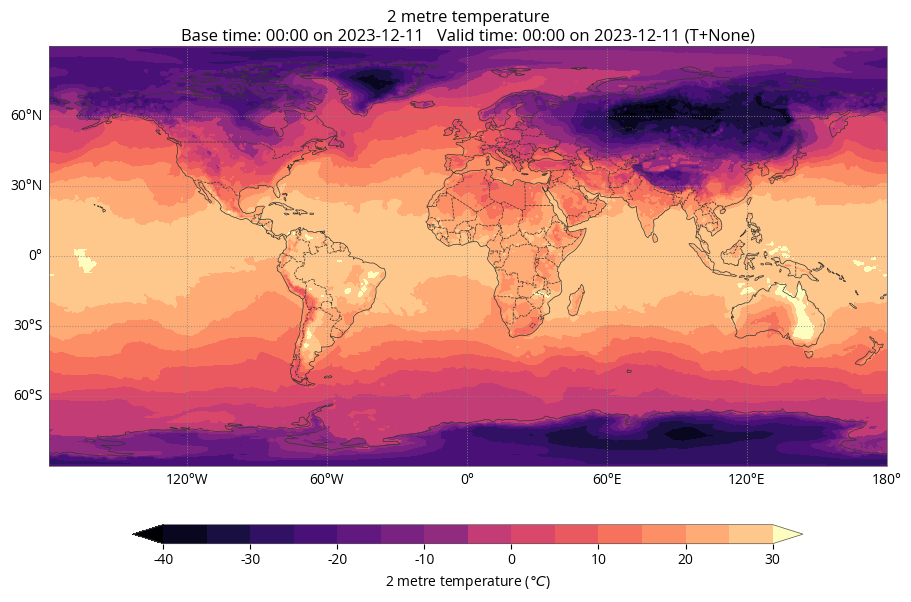

In [3]:
earthkit.maps.quickplot(data, style=style)

Now we will plot a specific area using earthkit-maps. In this case we will plot the data we have retrieved over Europe.

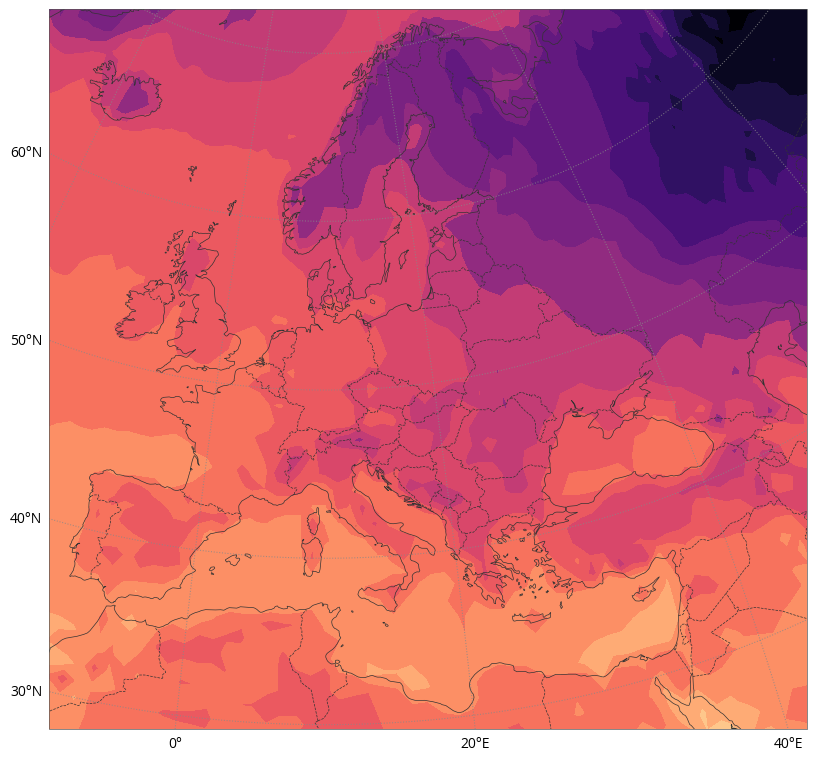

In [5]:
chart = earthkit.maps.Chart(domain="Europe")

chart.coastlines()
chart.land()
chart.borders()
chart.gridlines()
chart.plot(data, style=style)

chart.show()